In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading data
df=pd.read_csv("train.csv")

In [3]:
df.head()

,Unnamed: 0,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
0,0,2013,-37.0,1.0,0.0,4.0,-0.7,102-37,0.0,NNW,4.4
1,1,201-37,-37.0,1.0,1.0,8.0,-1.1,1023.2,0.0,N,NaN
2,2,2013,3.0,1.0,2.0,7.0,-1.1,1023.5,0.0,NNW,5.6
3,3,2013,3.0,1.0,3.0,6.0,-1.4,1024.5,0.0,NW,3.1
4,4,2013,3.0,1.0,4.0,3.0,-2.0,1025.2,0.0,N,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31527 entries, 0 to 31526
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      31527 non-null  int64  
 1   year            31512 non-null  object 
 2   month           31521 non-null  float64
 3   day             31507 non-null  float64
 4   hour            31519 non-null  float64
 5   PM2.5           31513 non-null  float64
 6   temperature     31508 non-null  float64
 7   pressure        31500 non-null  object 
 8   rain            31515 non-null  float64
 9   wind_direction  31467 non-null  object 
 10  wind_speed      31502 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 2.6+ MB


In [5]:
df.shape[0]


31527

# CHECKING FOR COUNT OF NULL VALUES

In [6]:
df.isnull().sum()

Unnamed: 0         0
year              15
month              6
day               20
hour               8
PM2.5             14
temperature       19
pressure          27
rain              12
wind_direction    60
wind_speed        25
dtype: int64

In [7]:
df.isnull().sum()/df.shape[0]*100.0

Unnamed: 0        0.000000
year              0.047578
month             0.019031
day               0.063438
hour              0.025375
PM2.5             0.044406
temperature       0.060266
pressure          0.085641
rain              0.038063
wind_direction    0.190313
wind_speed        0.079297
dtype: float64

In [8]:
df=df.drop(columns="Unnamed: 0")

In [9]:
df.shape

(31527, 10)

In [10]:
df1=df.copy()

# CLEANING -"wind_speed"

DISTPLOT FOR - "wind_speed"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind_speed', ylabel='Density'>

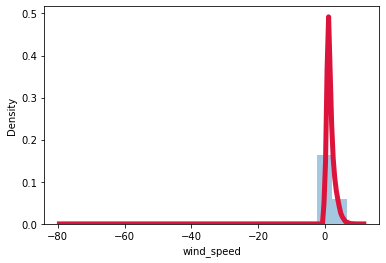

In [11]:
sns.distplot(df["wind_speed"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [12]:
df1=df1.drop(df1[df1['wind_speed'] < 0].index)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind_speed', ylabel='Density'>

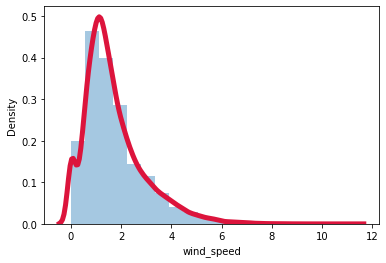

In [13]:
sns.distplot(df1["wind_speed"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [14]:
df1['wind_speed'].interpolate(method='polynomial',order=5, direction = 'both', inplace=True) 

In [15]:
df1["wind_speed"].isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='wind_speed', ylabel='Density'>

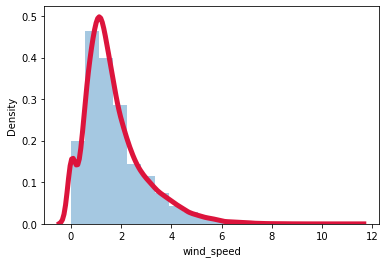

In [16]:
sns.distplot(df1["wind_speed"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

# CLEANING -"wind_direction"

FINDING THE MOST OCCURRING WIND DIRECTION

In [17]:
index = df1["wind_direction"]
index.value_counts()

NE     4464
ENE    3547
SW     3040
E      2343
NNE    2242
WSW    2054
SSW    1984
N      1893
NW     1559
ESE    1548
NNW    1360
S      1206
SE     1184
W      1095
WNW    1019
SSE     927
Name: wind_direction, dtype: int64

In [18]:
df1["wind_direction"]=df["wind_direction"].fillna("NE")

df1["wind_direction"].isnull().sum()

0

# CLEANING - "rain"

DISTPLOT FOR- "rain"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='rain', ylabel='Density'>

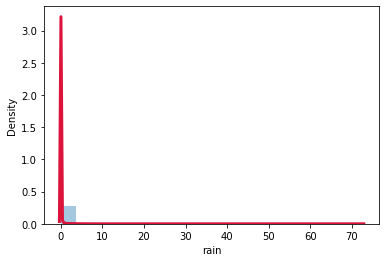

In [19]:
sns.distplot(df1["rain"], bins=20, kde_kws={'linewidth':3, 'color':'#DC143C'})

In [20]:
#df1["rain"]=df["rain"].ffill()
df1['rain'].interpolate(method='linear', direction = 'both', inplace=True) 
df1["rain"].isnull().sum()

0

# CLEANING -"pressure" 

CONVERTING OBJECT TO NUMERIC DATA TYPE

In [21]:
df1["pressure"][0]="1023.7"
df1["pressure"]=pd.to_numeric(df1["pressure"])

<ipython-input-21-36eff2814c0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["pressure"][0]="1023.7"


DISTPLOT FOR PRESSURE

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure', ylabel='Density'>

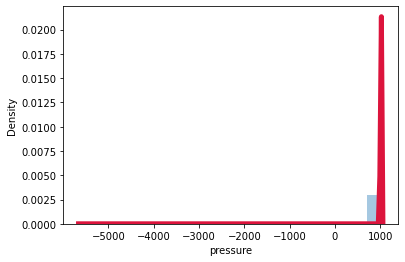

In [22]:
sns.distplot(df1["pressure"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure', ylabel='Density'>

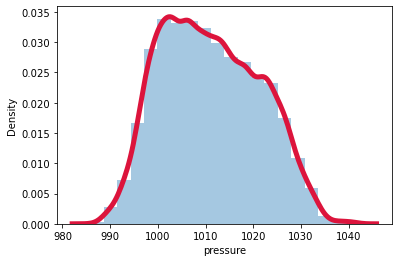

In [23]:
df1.drop(df1[df1['pressure'] < 0].index, inplace = True)
sns.distplot(df1["pressure"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pressure', ylabel='Density'>

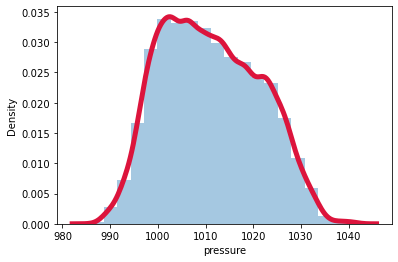

In [24]:
df1['pressure'].interpolate(method='polynomial',order=5, direction = 'both', inplace=True) 
sns.distplot(df1["pressure"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [25]:
df1["pressure"].isnull().sum()

0

# CLEANING-"temperature"

CONVERTING TEMPERATURE TO KELVIN

In [26]:
df1["temperature"]=df1["temperature"]+273
df1["temperature"].isnull().sum()

19

DISTPLOT FOR TEMPERATURE

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='temperature', ylabel='Density'>

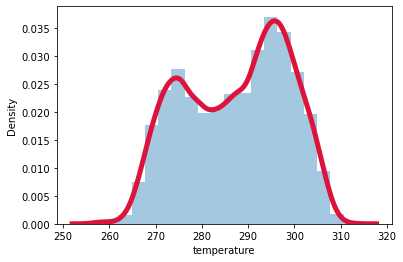

In [27]:
sns.distplot(df1["temperature"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [28]:
df1['temperature'].interpolate(method='polynomial',order=5, direction = 'both', inplace=True) 

In [29]:
df1["temperature"].isnull().sum()

0

# CLEANING-"PM2.5" 

In [30]:
df1["PM2.5"]

0         4.0
1         8.0
2         7.0
3         6.0
4         3.0
         ... 
31522    80.0
31523    75.0
31524    51.0
31525     9.0
31526     5.0
Name: PM2.5, Length: 31524, dtype: float64

In [31]:
df1["PM2.5"].isnull().sum()

14

HISTPLOT FOR -"PM2.5"

(array([31509.,     0.,     0.,     0.]),
 array([    0, 10000, 20000, 30000, 40000]),
 <BarContainer object of 4 artists>)

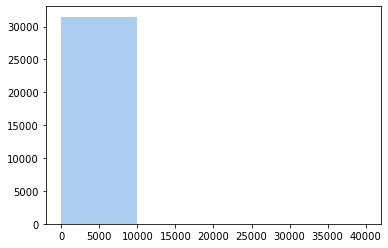

In [32]:
plt.hist(df1["PM2.5"],bins=[0,10000,20000,30000,40000],color='#abcdef')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM2.5', ylabel='Density'>

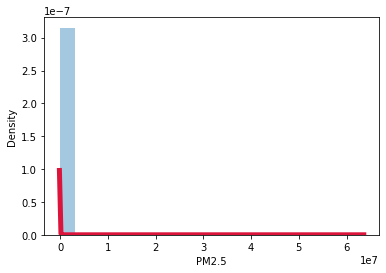

In [33]:
sns.distplot(df1["PM2.5"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})


In [34]:
df1["PM2.5"].value_counts()

9.0      538
10.0     530
13.0     513
12.0     509
11.0     504
        ... 
507.0      1
635.0      1
470.0      1
395.0      1
519.0      1
Name: PM2.5, Length: 525, dtype: int64

In [35]:
df1['PM2.5'].interpolate(method='linear', direction = 'both', inplace=True) 

# CLEANING-"hour"

In [36]:
df1["PM2.5"].isnull().sum()

0

DISTPLOT FOR-"hour"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

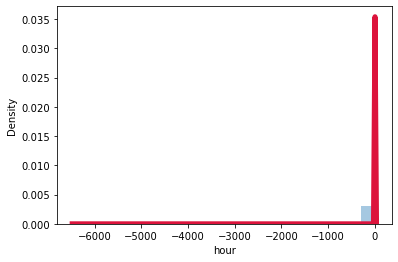

In [37]:
sns.distplot(df1["hour"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})


In [38]:
df1=df1.drop(df1[df1['hour'] < 0].index)
df1=df1.drop(df1[df1['hour'] > 23].index)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

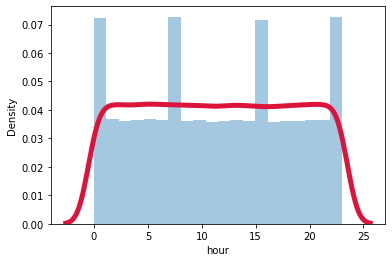

In [39]:
sns.distplot(df1["hour"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [40]:
df1['hour'].interpolate(method='linear', direction = 'both', inplace=True) 
df1.hour.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hour', ylabel='Density'>

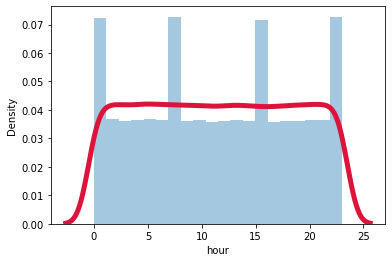

In [41]:
sns.distplot(df1["hour"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [42]:
index = df1["hour"]
index.value_counts()

5.0     1335
2.0     1333
21.0    1327
20.0    1323
23.0    1322
4.0     1319
6.0     1319
7.0     1319
8.0     1318
10.0    1316
13.0    1316
22.0    1315
0.0     1313
19.0    1313
14.0    1313
18.0    1313
3.0     1308
1.0     1307
9.0     1306
12.0    1306
17.0    1297
16.0    1296
15.0    1296
11.0    1293
Name: hour, dtype: int64

# CLEANING-"day"

In [43]:
df1['day'].isnull().sum()

20

HISTPLOT FOR -"day"

(array([31502.,     0.,     0.,     0.]),
 array([  0,  50, 100, 150, 200]),
 <BarContainer object of 4 artists>)

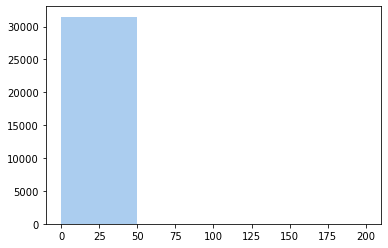

In [44]:
plt.hist(df1["day"],bins=[0,50,100,150,200],color='#abcdef')

In [45]:
df1["day"].value_counts()

 4.0       1069
 5.0       1068
 8.0       1066
 14.0      1063
 3.0       1059
 6.0       1055
 13.0      1053
 7.0       1049
 15.0      1048
 11.0      1047
 2.0       1044
 16.0      1043
 1.0       1042
 9.0       1039
 12.0      1038
 17.0      1036
 22.0      1033
 21.0      1031
 24.0      1030
 19.0      1026
 10.0      1023
 18.0      1021
 20.0      1013
 23.0      1012
 25.0      1011
 28.0      1004
 27.0       995
 26.0       985
 29.0       967
 30.0       938
 31.0       594
-5656.0       1
Name: day, dtype: int64

In [46]:
df1=df1.drop(df1[df1['day'] <0].index)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='day', ylabel='Density'>

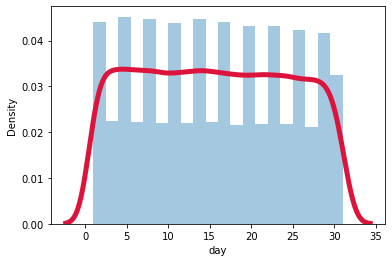

In [47]:
sns.distplot(df1["day"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [48]:
df1['day'].interpolate(method='quadratic', direction = 'both', inplace=True) 
df1.hour.isnull().sum()

0

# CLEANING FOR- "month"

In [49]:
df1['month'].isnull().sum() 

6

In [50]:
df1["month"].value_counts()

 5.0     2953
 7.0     2931
 3.0     2922
 6.0     2825
 8.0     2815
 4.0     2741
 9.0     2627
 10.0    2611
 11.0    2464
 1.0     2399
 12.0    2121
 2.0     2105
-37.0       2
Name: month, dtype: int64

In [51]:
df1=df1.drop(df1[df1['month'] <0].index)
df1

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
2,2013,3.0,1.0,2.0,7.0,271.9,1023.5,0.0,NNW,5.6
3,2013,3.0,1.0,3.0,6.0,271.6,1024.5,0.0,NW,3.1
4,2013,3.0,1.0,4.0,3.0,271.0,1025.2,0.0,N,2.0
5,2013,3.0,1.0,5.0,5.0,270.8,1025.6,0.0,N,3.7
6,2013,3.0,1.0,6.0,3.0,270.4,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...
31522,2017,2.0,27.0,6.0,80.0,272.7,1019.4,0.0,ENE,0.8
31523,2017,2.0,27.0,16.0,75.0,288.9,1014.0,0.0,SW,2.9
31524,2017,2.0,27.0,19.0,51.0,284.5,1014.1,0.0,SSW,1.0
31525,2017,2.0,28.0,2.0,9.0,281.6,1016.0,0.0,NNE,0.9


In [52]:
df1['month'].interpolate(method='polynomial',order=7, direction = 'both', inplace=True) 
df1.hour.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='month', ylabel='Density'>

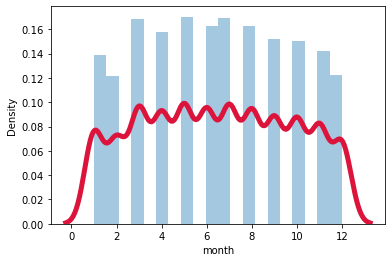

In [53]:
sns.distplot(df1["month"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

# CLEANING -"year"

In [54]:
df1.year.isnull().sum()

15

In [55]:
df1["year"].value_counts()

2015    8539
2014    8251
2013    7329
2016    7093
2017     293
Name: year, dtype: int64

CONVERTING OBJECT TO NUMERIC DATA TYPE

In [56]:
df1["year"]=pd.to_numeric(df1["year"])
df1["year"]

2        2013.0
3        2013.0
4        2013.0
5        2013.0
6        2013.0
          ...  
31522    2017.0
31523    2017.0
31524    2017.0
31525    2017.0
31526    2017.0
Name: year, Length: 31520, dtype: float64

DISTPLOT FOR -"year"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

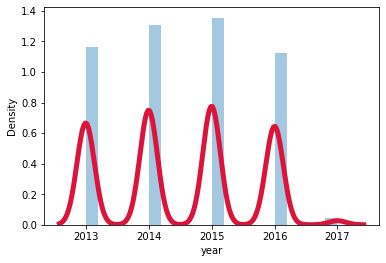

In [57]:
sns.distplot(df1["year"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

In [58]:
df1['year'].interpolate(method='polynomial', order=5,direction = 'both', inplace=True) 
df1.hour.isnull().sum()

0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='year', ylabel='Density'>

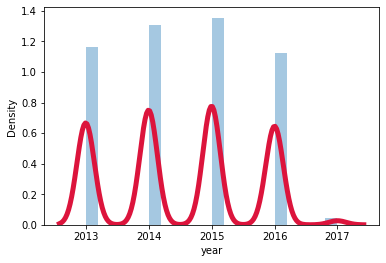

In [59]:
sns.distplot(df1["year"], bins=20, kde_kws={'linewidth':5, 'color':'#DC143C'})

#                                         CLEANING DONE

# DATA SHAPES AFTER CLEANING

In [60]:
print("Original data shape=",df.shape)
print("Cleaned data shape=",df1.shape)

Original data shape= (31527, 10)
Cleaned data shape= (31520, 10)


In [61]:
data=df.isnull().sum()
data1=df1.isnull().sum()
print("NULL COUNT IN ORIGINAL DATA=")
print(data)
print("\nNULL COUNT IN CLEANED DATA=")
print(data1)

NULL COUNT IN ORIGINAL DATA=
year              15
month              6
day               20
hour               8
PM2.5             14
temperature       19
pressure          27
rain              12
wind_direction    60
wind_speed        25
dtype: int64

NULL COUNT IN CLEANED DATA=
year              0
month             0
day               0
hour              0
PM2.5             0
temperature       0
pressure          0
rain              0
wind_direction    0
wind_speed        0
dtype: int64


# DESCRIPTION OF CLEANED DATA

In [62]:
df1.describe()

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed
count,31520.000000,31520.000000,31520.000000,31520.000000,3.152000e+04,31520.000000,31520.000000,31520.000000,31520.000000
mean,2014.516720,6.453903,15.592506,11.494099,2.095210e+03,287.357447,1011.012986,0.071732,1.702220
std,1.105024,3.308569,8.791907,6.931708,3.574690e+05,11.297239,10.216333,0.949645,1.200755
min,2013.000000,1.000000,1.000000,0.000000,3.000000e+00,256.200000,985.900000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.000000,2.300000e+01,277.300000,1002.700000,0.000000,0.900000
50%,2015.000000,6.000000,15.000000,11.000000,5.800000e+01,288.800000,1010.300000,0.000000,1.400000
75%,2015.000000,9.000000,23.000000,18.000000,1.130000e+02,296.700000,1019.000000,0.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,6.346466e+07,313.500000,1042.000000,72.500000,11.200000


In [63]:
df1.index = [i for i in range(1, 31521)]
df1

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_direction,wind_speed
1,2013.0,3.0,1.0,2.0,7.0,271.9,1023.5,0.0,NNW,5.6
2,2013.0,3.0,1.0,3.0,6.0,271.6,1024.5,0.0,NW,3.1
3,2013.0,3.0,1.0,4.0,3.0,271.0,1025.2,0.0,N,2.0
4,2013.0,3.0,1.0,5.0,5.0,270.8,1025.6,0.0,N,3.7
5,2013.0,3.0,1.0,6.0,3.0,270.4,1026.5,0.0,NNE,2.5
...,...,...,...,...,...,...,...,...,...,...
31516,2017.0,2.0,27.0,6.0,80.0,272.7,1019.4,0.0,ENE,0.8
31517,2017.0,2.0,27.0,16.0,75.0,288.9,1014.0,0.0,SW,2.9
31518,2017.0,2.0,27.0,19.0,51.0,284.5,1014.1,0.0,SSW,1.0
31519,2017.0,2.0,28.0,2.0,9.0,281.6,1016.0,0.0,NNE,0.9


In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
le=LabelEncoder()
label=le.fit_transform(df1["wind_direction"])
le.classes_

array(['E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE',
       'SSW', 'SW', 'W', 'WNW', 'WSW'], dtype=object)

In [66]:
df3=df1.drop(columns="wind_direction")
df3["wind_direction"]=label

# df3 is cleaned data

In [67]:
df3

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,wind_direction
1,2013.0,3.0,1.0,2.0,7.0,271.9,1023.5,0.0,5.6,6
2,2013.0,3.0,1.0,3.0,6.0,271.6,1024.5,0.0,3.1,7
3,2013.0,3.0,1.0,4.0,3.0,271.0,1025.2,0.0,2.0,3
4,2013.0,3.0,1.0,5.0,5.0,270.8,1025.6,0.0,3.7,3
5,2013.0,3.0,1.0,6.0,3.0,270.4,1026.5,0.0,2.5,5
...,...,...,...,...,...,...,...,...,...,...
31516,2017.0,2.0,27.0,6.0,80.0,272.7,1019.4,0.0,0.8,1
31517,2017.0,2.0,27.0,16.0,75.0,288.9,1014.0,0.0,2.9,12
31518,2017.0,2.0,27.0,19.0,51.0,284.5,1014.1,0.0,1.0,11
31519,2017.0,2.0,28.0,2.0,9.0,281.6,1016.0,0.0,0.9,5


In [68]:
df3.to_csv('cleaned.csv')

# DAY 4


Next task:-

1. Find outliers and fix or remove them. Mention the methods and explain how did you find the outliers. Also, give reason that why have you removed or fixed the values of the outliers.

2. Analyse each column with every other coulmn and find the relationship between the two columns. This can be done using various plots/graphs.

3. Find the correlation of PM2.5 with rest of the coulmns using correlation matrix and then visulaize the correlation matrix using heatmap.

4. Perform various plots like:- scatter plots, lm plots, bar plots, pie plots etc according to the values in the columns. Keep in mind that you don't need to plot every type of plots, plot only the ones you think are suitable for a column.

5. Plot box plot for every column and write your observations that you observed from the box plot.

6. Find how PM2.5 is getting affected by other coulmns.

Each task has it's own value so don't miss any task. Mention the task in your code file and then do the task.

We are sorry for the delay in providing the tasks.

The deadline for the task is 16 September 12 PM.

## ***TASK 1***

FINDING OUTLIERS USING BOXPLOT AND REMOVING THEM USING INTER QUARTILE RANGE (IQR) METHOD.

FIRST WE PLOTTED BOXPLOT FOR EACH FEATURE.
IF ANY OUTLIERS WERE FOUND THEN THEY WERE REMOVED USING IQR METHOD

FOLLOWING STEPS WERE USED TO REMOVE OUTLIERS-
1)Calculate the interquartile range for the data.
2)Multiply the interquartile range (IQR) by 1.5 (a constant used to discern outliers).
3)Add 1.5 x (IQR) to the third quartile. Any number greater than this is a suspected outlier.

In [69]:
import warnings
warnings.filterwarnings("ignore")
df4=df3.copy()

In [70]:
df4.head()

,year,month,day,hour,PM2.5,temperature,pressure,rain,wind_speed,wind_direction
1,2013.0,3.0,1.0,2.0,7.0,271.9,1023.5,0.0,5.6,6
2,2013.0,3.0,1.0,3.0,6.0,271.6,1024.5,0.0,3.1,7
3,2013.0,3.0,1.0,4.0,3.0,271.0,1025.2,0.0,2.0,3
4,2013.0,3.0,1.0,5.0,5.0,270.8,1025.6,0.0,3.7,3
5,2013.0,3.0,1.0,6.0,3.0,270.4,1026.5,0.0,2.5,5


<AxesSubplot:xlabel='year'>

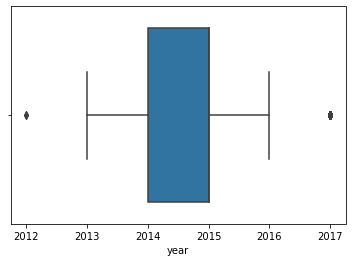

In [71]:
sns.boxplot(df4["year"].astype(int))

<AxesSubplot:xlabel='month'>

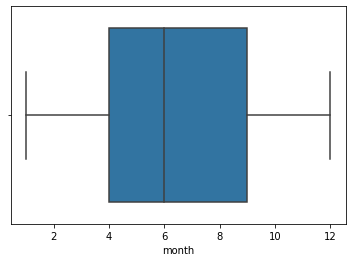

In [72]:
sns.boxplot(df4["month"])

<AxesSubplot:xlabel='hour'>

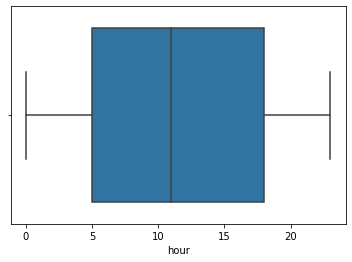

In [73]:
sns.boxplot(df4["hour"])

<AxesSubplot:xlabel='PM2.5'>

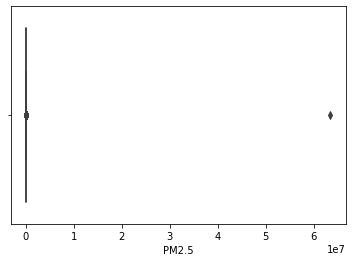

In [74]:
sns.boxplot(df4["PM2.5"])

In [75]:
percentile25 = df['PM2.5'].quantile(0.25)
percentile75 = df['PM2.5'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
##lower_limit = percentile25 - 1.5 * iqr

df4["PM2.5"].loc[df4["PM2.5"] > upper_limit] = np.nan
print(upper_limit)

248.0


<AxesSubplot:xlabel='PM2.5'>

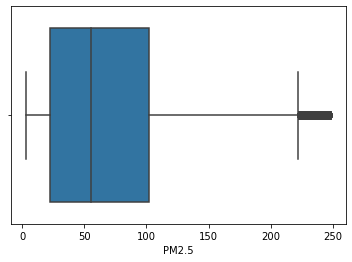

In [76]:
sns.boxplot(df4["PM2.5"])

In [77]:
df4['PM2.5'].interpolate(method='linear', direction = 'forward', inplace=True) 
df4["PM2.5"].isnull().sum()

0

<AxesSubplot:xlabel='PM2.5'>

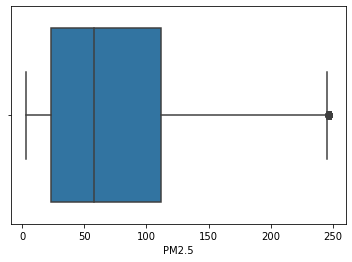

In [78]:
sns.boxplot(df4["PM2.5"])


<AxesSubplot:xlabel='temperature'>

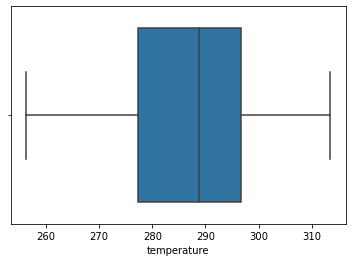

In [79]:
sns.boxplot(df4["temperature"])

<AxesSubplot:xlabel='pressure'>

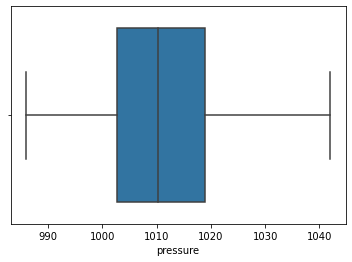

In [80]:
sns.boxplot(df4["pressure"])

<AxesSubplot:xlabel='rain'>

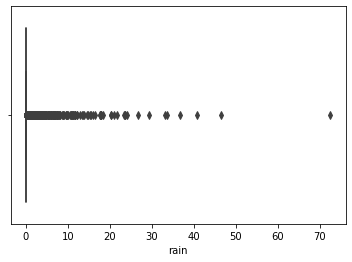

In [81]:
sns.boxplot(df4["rain"])


<AxesSubplot:xlabel='wind_speed'>

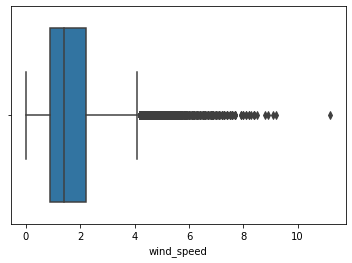

In [82]:
sns.boxplot(df4.wind_speed)

In [83]:
percentile25 = df['wind_speed'].quantile(0.25)
percentile75 = df['wind_speed'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
##lower_limit = percentile25 - 1.5 * iqr

#df4["wind_speed"].loc[df4["wind_speed"] > upper_limit,'wind_speed'] = np.nan
df4.loc[df4.wind_speed > upper_limit, 'wind_speed'] = np.nan
df4["wind_speed"].isnull().sum()

1523

In [84]:
df4['wind_speed'].fillna(df4.wind_speed.mean(),inplace=True) 


In [85]:
df4["wind_speed"].isnull().sum()

0

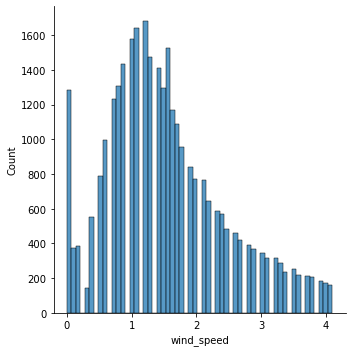

In [86]:
sns.displot(df4.wind_speed)

<AxesSubplot:xlabel='wind_speed'>

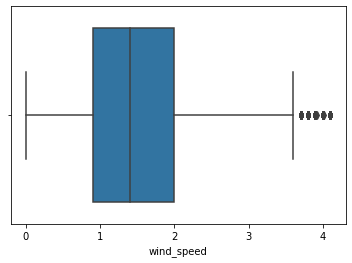

In [87]:
sns.boxplot(df4.wind_speed)

## ***TASK 2***

FINDING RELATION BETWEEN COLUMNS USING PAIRPLOT

<Figure size 1800x1800 with 0 Axes>

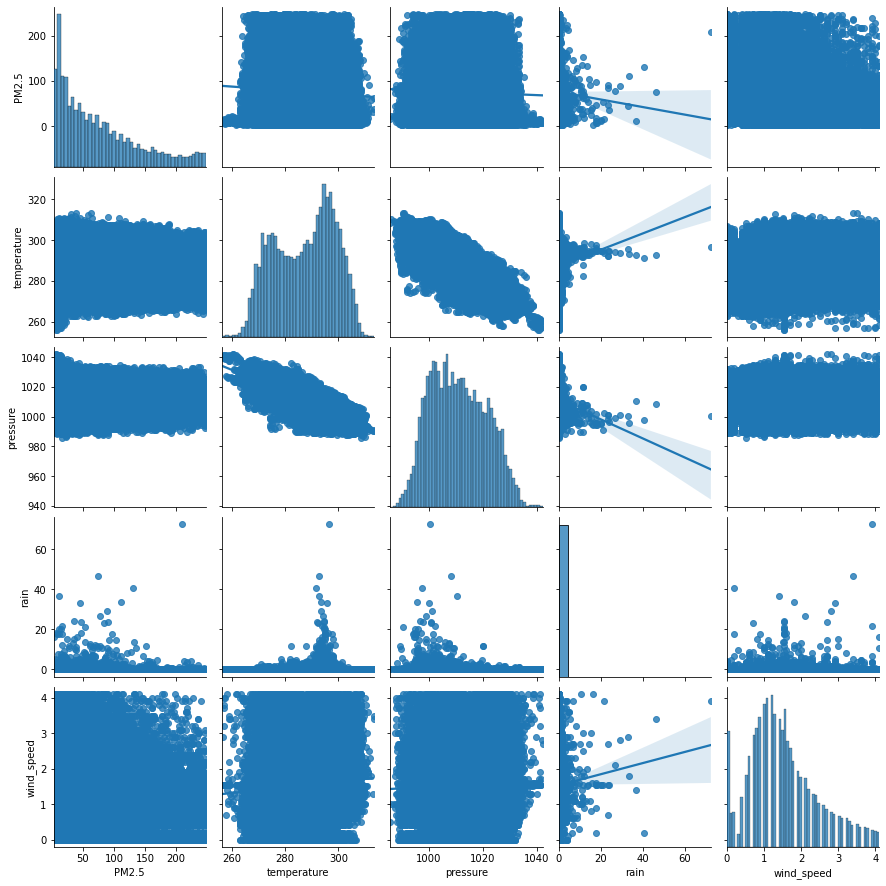

In [88]:
plt.figure(figsize=(25,25))
sns.pairplot(df4.iloc[:, 4:9], markers=["o"],kind="reg")


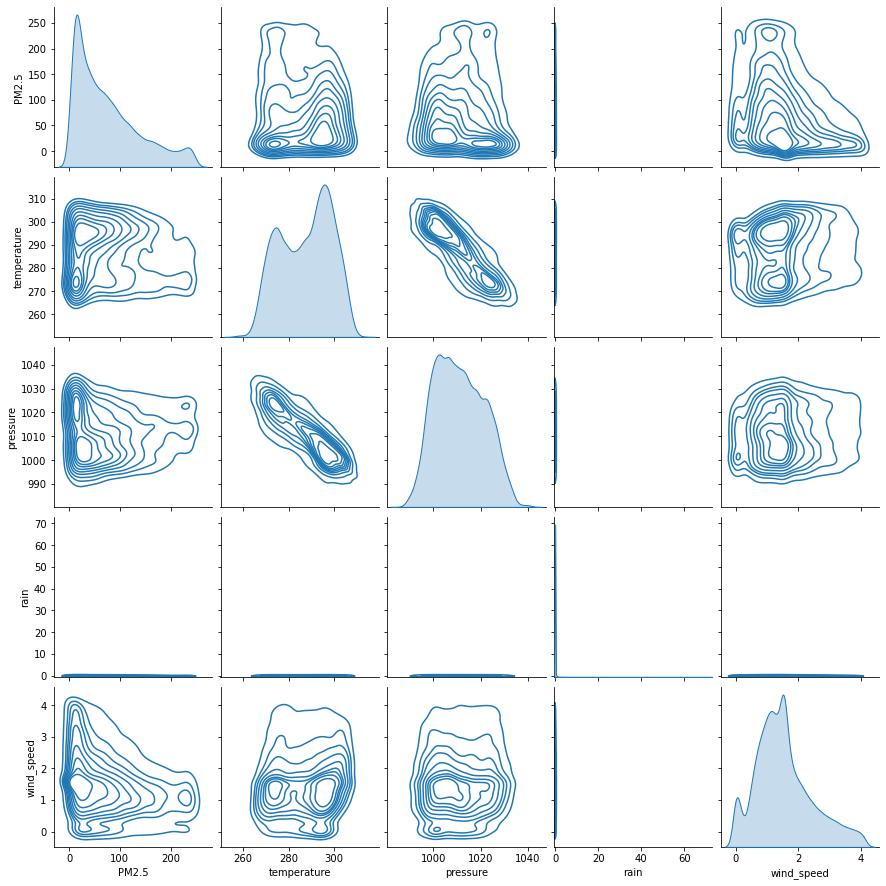

In [108]:
sns.pairplot(df4.iloc[:, 4:9], markers=["o", "s"],kind="kde")

## FROM ABOVE PAIRPLOT WE CONCLUDE THE FOLLOWING POINTS-

1)PM2.5 IS FOUND TO BE VERY LESS AT HIGH WIND SPEED.

2)AT VERY LOW TEMPERATURE AND VERY HIGH TEMPERATURE PM2.5 IS VERY LESS AND EVEN IF IT IS PRESENT THEN ITS CONCENTRATION IS VERY   LESS.

3)AS TEMPERATURE INCREASES PRESURE DECREASES IN LINEAR FASHION.


## ***TASK 3***


**From below heatmap we infer that -**

**1)PM2.5 does not correlate much with other features.It only correlates with "wind_speed" with a value of -0.25 which means it decreases with increase in "wind_speed".**

**2)Pressure varies inversely with temperature with a coerrelation value of -0.8 .**

<AxesSubplot:>

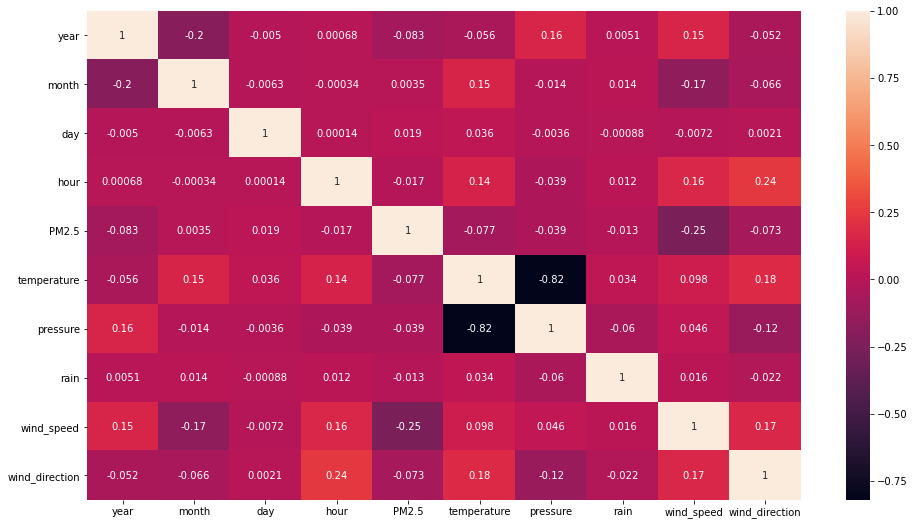

In [89]:
plt.figure(figsize=(16,9))
sns.heatmap(df4.corr(),annot=True)

# **TASK 4**
Perform various plots like:- scatter plots, lm plots, bar plots, pie plots etc according to the values in the columns. Keep in mind that you don't need to plot every type of plots, plot only the ones you think are suitable for a column.

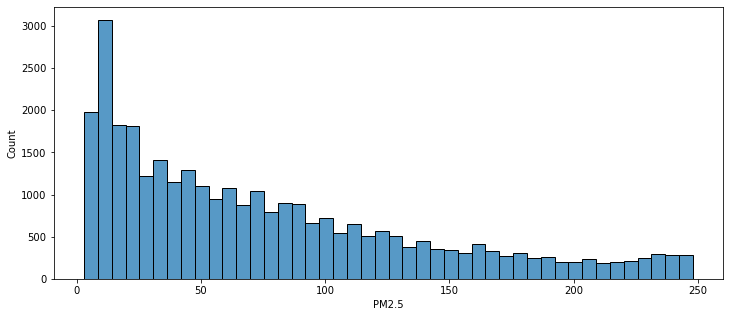

In [109]:
sns.histplot(x="PM2.5",data=df4)
plt.savefig('foo.png')

<AxesSubplot:xlabel='temperature', ylabel='Count'>

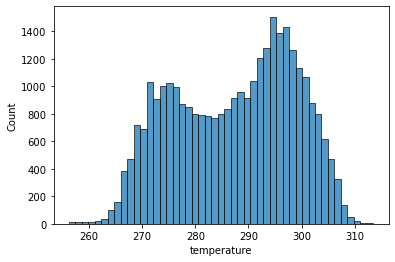

In [91]:
sns.histplot(x="temperature",data=df4)


<AxesSubplot:xlabel='pressure', ylabel='Count'>

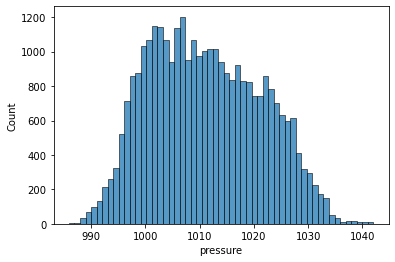

In [92]:
sns.histplot(x="pressure",data=df4)


<AxesSubplot:xlabel='rain', ylabel='Count'>

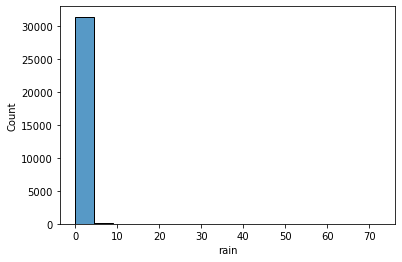

In [93]:
sns.histplot(x="rain",data=df4)


<AxesSubplot:xlabel='wind_speed', ylabel='Count'>

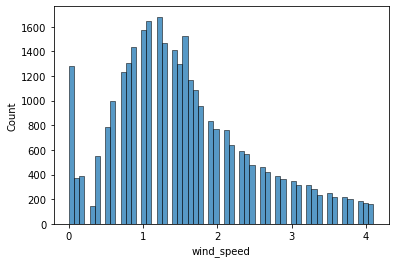

In [94]:
sns.histplot(x="wind_speed",data=df4)


# **TASK5**
 Plot box plot for every column and write your observations that you observed from the box plot.
 
 
Boxplot captures the summary of the data efficiently with a simple box and whiskers and allows us to compare easily across groups. Boxplot summarizes a sample data using 25th, 50th and 75th percentiles. These percentiles are also known as the lower quartile, median and upper quartile.

A box plot consist of 5 things.

**Minimum**

**First Quartile or 25%**

**Median (Second Quartile) or 50%**

**Third Quartile or 75%**

**Maximum**

Using boxplot we found out the range in which majority of our data for  specified columns were concentrated 

{'whiskers': [<matplotlib.lines.Line2D at 0x1df0ed4c820>,
 'caps': [<matplotlib.lines.Line2D at 0x1df0ed4cee0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df0ed4c4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df0ed575e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df0ed57940>],
 'means': []}

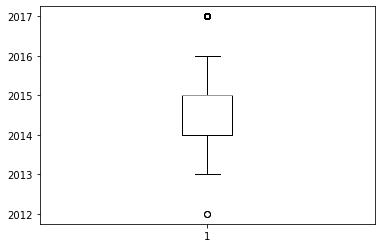

In [95]:
plt.boxplot(df4["year"].astype(int))

WE  CONCLUDE THAT MAJORITY DATA BELONGS FROM YEAR 2013 TO 2016 WITH SINGLE DATAS BELONGING TO 2012 AND 2017

{'whiskers': [<matplotlib.lines.Line2D at 0x1df0edab460>,
 'caps': [<matplotlib.lines.Line2D at 0x1df0edabb20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df0edab100>],
 'medians': [<matplotlib.lines.Line2D at 0x1df0edb5220>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df0edb5580>],
 'means': []}

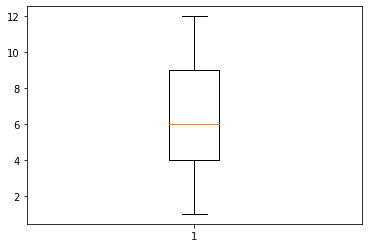

In [96]:
plt.boxplot(df4["month"].astype(int))

{'whiskers': [<matplotlib.lines.Line2D at 0x1df0edf7fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df0ee076d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df0edf7c70>],
 'medians': [<matplotlib.lines.Line2D at 0x1df0ee07d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df0ee12130>],
 'means': []}

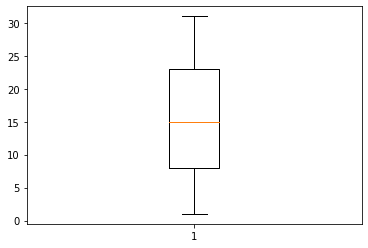

In [97]:
plt.boxplot(df4["day"].astype(int))

{'whiskers': [<matplotlib.lines.Line2D at 0x1df0fe360d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df0fe36790>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df0fe25d30>],
 'medians': [<matplotlib.lines.Line2D at 0x1df0fe36e50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df0fe411f0>],
 'means': []}

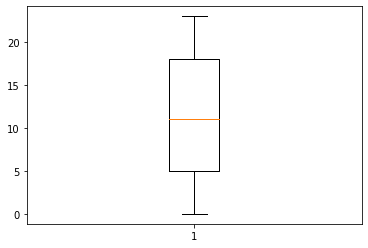

In [98]:
plt.boxplot(df4["hour"].astype(int))

{'whiskers': [<matplotlib.lines.Line2D at 0x1df0fe89670>,
 'caps': [<matplotlib.lines.Line2D at 0x1df0fe89d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df0fe89310>],
 'medians': [<matplotlib.lines.Line2D at 0x1df0fe93430>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df0fe93790>],
 'means': []}

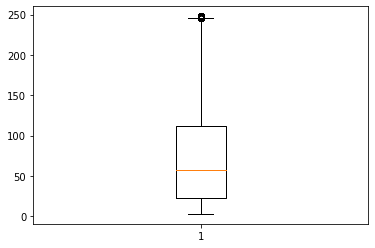

In [99]:
plt.boxplot(df4["PM2.5"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1df0fee51f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df0fee58b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df0fed6e50>],
 'medians': [<matplotlib.lines.Line2D at 0x1df0fee5f70>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df0fef0310>],
 'means': []}

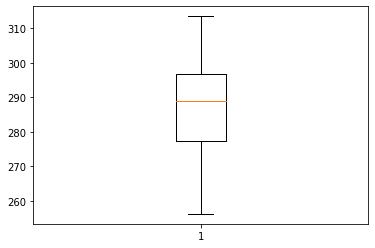

In [100]:
plt.boxplot(df4["temperature"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1df0ff31dc0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df0ff424c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df0ff31a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1df0ff42b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df0ff42e50>],
 'means': []}

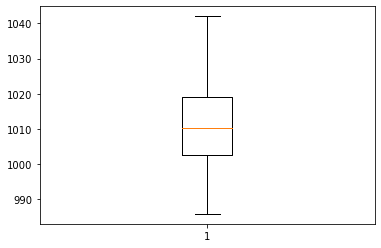

In [101]:
plt.boxplot(df4["pressure"])



{'whiskers': [<matplotlib.lines.Line2D at 0x1df0ff918b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1df0ff91f70>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df0ff91550>],
 'medians': [<matplotlib.lines.Line2D at 0x1df0ff9d670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df0ff9d9d0>],
 'means': []}

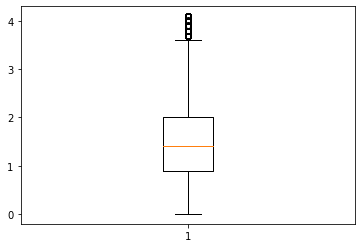

In [102]:
plt.boxplot(df4["wind_speed"])


{'whiskers': [<matplotlib.lines.Line2D at 0x1df0ffe2f40>,
 'caps': [<matplotlib.lines.Line2D at 0x1df0fff0640>,
 'boxes': [<matplotlib.lines.Line2D at 0x1df0ffe2be0>],
 'medians': [<matplotlib.lines.Line2D at 0x1df0fff0d00>],
 'fliers': [<matplotlib.lines.Line2D at 0x1df0fffd0a0>],
 'means': []}

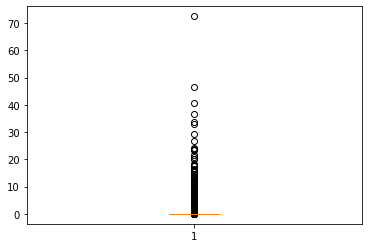

In [103]:
plt.boxplot(df4["rain"])


WE CONCLUDE THAT  MAJORITY RAINFALL WAS NEAR TO 1CM AND SOMEDAYS THEIR WAS HEAVY RAINFALL

## **TASK 6**

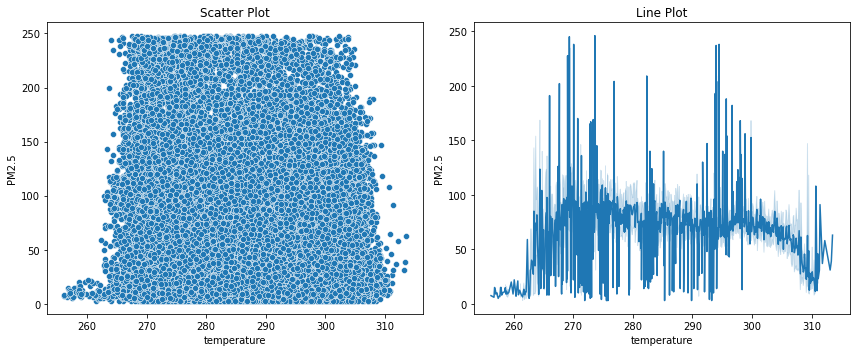

In [104]:
from matplotlib import rcParams


rcParams['figure.figsize'] = 12,5


plt.subplot(1,2,1)
sns.scatterplot(x="temperature", y="PM2.5",data=df4,sizes=(20, 20))
plt.title("Scatter Plot")

plt.subplot(1,2,2)
sns.lineplot(x="temperature", y="PM2.5",data=df4)
plt.title("Line Plot")
plt.tight_layout()



### At high temperature or less temperature the concentration of PM2.5 is very less or negligible but at normal temperature it is quite high.

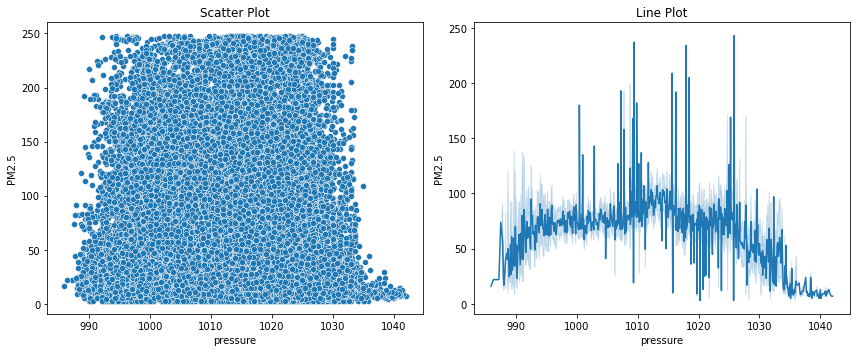

In [105]:
from matplotlib import rcParams


rcParams['figure.figsize'] = 12,5


plt.subplot(1,2,1)
sns.scatterplot(x="pressure", y="PM2.5",data=df4,sizes=(20, 20))
plt.title("Scatter Plot")

plt.subplot(1,2,2)
sns.lineplot(x="pressure", y="PM2.5",data=df4)
plt.title("Line Plot")
plt.tight_layout()



### At high pressure or less pressure the concentration of PM2.5 is very less or negligible but at normal pressure it is quite high.

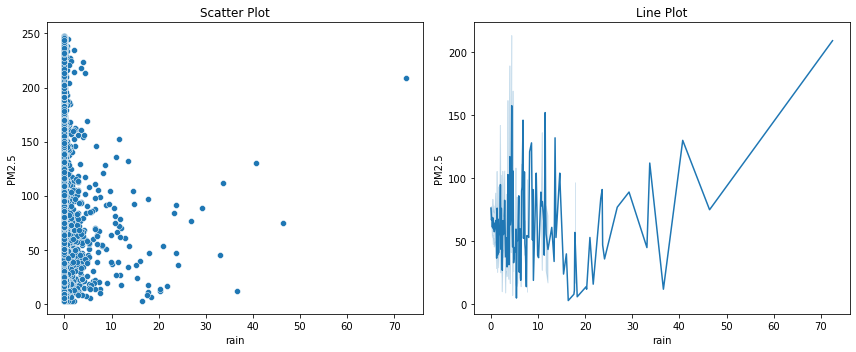

In [106]:
from matplotlib import rcParams


rcParams['figure.figsize'] = 12,5


plt.subplot(1,2,1)
sns.scatterplot(x="rain", y="PM2.5",data=df4,sizes=(20, 20))
plt.title("Scatter Plot")

plt.subplot(1,2,2)
sns.lineplot(x="rain", y="PM2.5",data=df4)
plt.title("Line Plot")
plt.tight_layout()



### As we dont have much data of high rainfall and most of the rainfall is near to 0 or 0 , no concrete conclusion can be drawn from this.

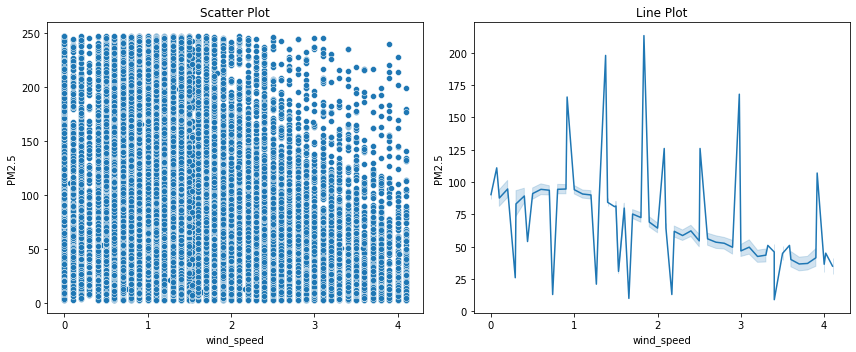

In [107]:
from matplotlib import rcParams


rcParams['figure.figsize'] = 12,5


plt.subplot(1,2,1)
sns.scatterplot(x="wind_speed", y="PM2.5",data=df4,sizes=(20, 20))
plt.title("Scatter Plot")

plt.subplot(1,2,2)
sns.lineplot(x="wind_speed", y="PM2.5",data=df4)
plt.title("Line Plot")
plt.tight_layout()



### With increase in wind speed concentration of PM2.5 decreases.